# **Milestone 2 - Phase 2**

# **1. Perkenalan**

Nama: `Evita Ardhiya Ramadhani`, Batch: `11`

Dataset: Non and Biodegradable Material Dataset, Source: Kaggle dataset [1]

Problem: Membuat model Computer vision untuk image classification material non dan Biodegradable.

Limbah atau sampah dari penggunaan sehari-hari secara umum dapat dibedakan menjadi dua jenis yaitu:
- Biodegradable, mengandung bahan-bahan yang dapat terurai secara alami oleh mikroorganisme, seperti makanan, tanaman, buah-buahan, dll. Limbah dari bahan ini dapat diolah menjadi kompos.
- Non-biodegradable, mengandung bahan-bahan yang tidak dapat terurai secara alami, misalnya plastik, logam, unsur anorganik, dll. Limbah dari bahan ini akan didaur ulang menjadi bahan baru.

Untuk memaksimalkan pengolahan limbah tersebut diperlukan sebuah teknologi pemisah sampah tersebut secara efektif. Olek karena itu dibuat sebuah model computer vision yang dapat membantu dalam melakukan klasifikasi yang mana termasuk dalam sampah biodegradable dan non-biodegradable.

# **2. Import Libraries**

Import libraries yang diperlukan dalam pengerjaan assigment

In [1]:
# load data, linear algebra
import pandas as pd 
import numpy as np 

# visualisai
import matplotlib.pyplot as plt
import seaborn as sns

# Split data train-set dan test-set
from sklearn.model_selection import train_test_split 

# model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# metrics model evaluation
from sklearn.metrics import classification_report

import os
import glob
import cv2
import io
import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**



Pada assigment ini mengakses dataset langsung dari kaggle dataset sehingga tidak diperlukan mendowload file dataset ke local komputer [2].

In [2]:
# membuat folder di kaggle root
!mkdir -p ~/.kaggle
# copy paste kaggle.json ke folder kaggle
!cp kaggle.json ~/.kaggle

# membuat folder kaggle yang bukan diroot
!mkdir ./kaggle
# memindahkan file kaggle.json ke folder kaggle yang dibuat
!mv ./kaggle.json ./kaggle

In [3]:
# mengubah perizinan dalam direktori
!chmod 600 ~/.kaggle/kaggle.json

#cek list data yang ada di folder kaggle
!ls ~/.kaggle 

kaggle.json


In [4]:
# download dataset
!kaggle datasets download -d rayhanzamzamy/non-and-biodegradable-waste-dataset

 99% 1.84G/1.86G [00:14<00:00, 97.5MB/s]
100% 1.86G/1.86G [00:14<00:00, 137MB/s] 


In [5]:
# unzip folder yang telah didownload dari kaggle
!unzip -q /content/non-and-biodegradable-waste-dataset.zip -d images

Kemudian cek list direktori yang ada dalam file dataset

In [6]:
# cek list direktori
os.listdir('/content/images')

['TEST', 'TRAIN.2', 'TRAIN.4', 'TRAIN.3', 'TRAIN.1']

Definisikan path untuk dataset. Karena dataset ini telah tersedia data train dan test, maka definisikan path untuk data train dan test yang akan digunakan

In [7]:
# path dataset
main_path= '/content/images'

# path data train
train_path = os.path.join(main_path, 'TRAIN.1')

# path data test
test_path = os.path.join(main_path, 'TEST')

Setelah itu, definisikan label dari Biodegradable (B) dan Non-Biodegradable(N)

In [8]:
# Biodegradable label
label_bio = len(os.listdir(os.path.join(train_path, 'B')))

# Non-Biodegradable label
label_non = len(os.listdir(os.path.join(train_path, 'N')))

Mencari daftar atau file images dalam direktori

In [9]:
# mencari file images dalam direktori

# untuk data train 
train_bio= glob.glob(train_path + '/B/*.jpg')
train_non= glob.glob(train_path + '/N/*.jpg')

# untuk data test
test_bio= glob.glob(test_path + '/B/*.jpg')
test_non= glob.glob(test_path + '/N/*.jpg')

Membuat dataset menjadi bentuk dataframe

In [10]:
# buat fungsi untuk memasukkan data images dalam dataframe
def create_df(list_images):
  data=[]
  for image in list_images:
    data.append((image, image.split('/')[-2]))
  return pd.DataFrame(data, columns= ['images', 'label'])

In [11]:
# dataframe train
train_df= create_df(train_bio + train_non)
train_df= train_df.sample(frac=1, random_state=23).reset_index(drop=True)

# dataframe test
test_df= create_df(test_bio + test_non)
test_df= test_df.sample(frac=1, random_state=23).reset_index(drop=True)

In [12]:
# tampilkan shape dataframe
print('Size dari train', train_df.shape)
print('Size dari test', test_df.shape)

Size dari train (59893, 2)
Size dari test (16538, 2)


In [13]:
# tampilkan dataframe train
train_df

,images,label
0,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
1,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
2,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
3,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_3...,B
...,...,...
59888,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_6...,B
59889,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
59890,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
59891,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B


In [14]:
# tampilkan dataframe test
test_df

,images,label
0,/content/images/TEST/B/TEST_BIODEG_HFL_968.jpg,B
1,/content/images/TEST/B/TEST_BIODEG_HFL_367.jpg,B
2,/content/images/TEST/N/TEST_NBIODEG_ORI_3224.jpg,N
3,/content/images/TEST/N/TEST_NBIODEG_ORI_436.jpg,N
4,/content/images/TEST/B/TEST_BIODEG_HFL_1033.jpg,B
...,...,...
16533,/content/images/TEST/B/TEST_BIODEG_ROT_1207.jpg,B
16534,/content/images/TEST/N/TEST_NBIODEG_ORI_2216.jpg,N
16535,/content/images/TEST/N/TEST_NBIODEG_ORI_8339.jpg,N
16536,/content/images/TEST/N/TEST_NBIODEG_ORI_5877.jpg,N


In [15]:
# cek tipe data dari dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59893 entries, 0 to 59892
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  59893 non-null  object
 1   label   59893 non-null  object
dtypes: object(2)
memory usage: 936.0+ KB


- Dataframe hanya terdiri dari data images dan label
- Tidak terdapat missing value karena jumlah non-null dan rows sama

# **4. Exploratory Data Analysis (EDA)**

## Persentase jumlah label

Untuk melihat data imbalance atau tidak dengan cara mengitung jumlah label dari biodegradable dan non-biodegradable

Perbandingan label
 N    29951
B    29942
Name: label, dtype: int64


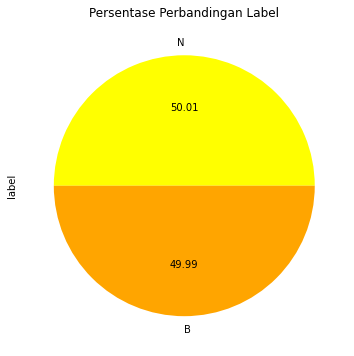

In [ ]:
# jumlah dari label
print('Perbandingan label\n',train_df['label'].value_counts())

# visualisasi pie chart dari label
train_df['label'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f', colors=['yellow', 'orange'])
plt.title('Persentase Perbandingan Label')
plt.show()

- Jumlah data balance, karena persentase dari label bio dan non-bio hanya berbeda hanya sekitar 1%
- Dengan data yang balance dapat mempermudah dalam model mempelajari pola masing-masing label dan dapat meningkatkan akurasi dari model.

## Tampilkan images dari biodegradable dan non-biodegradable

Menampilkan contoh image dari label biodegradable dan non-biodegradable [3]

In [ ]:
# sort image berdasarkan label
sample_bio = (train_df[train_df['label']=='B']['images'].iloc[:3]).tolist()
sample_non = (train_df[train_df['label']=='N']['images'].iloc[:3]).tolist()

# buat fungsi untukvisualisasi dari sample image
def visualize(samples):
  fig,ax= plt.subplots(nrows=2, ncols=3, figsize= (20,10))
  for i, sample in enumerate(samples):
    img= cv2.imread(sample)
    ax[i//3, i%3].set_title(sample.split('/')[-2])
    ax[i//3, i%3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

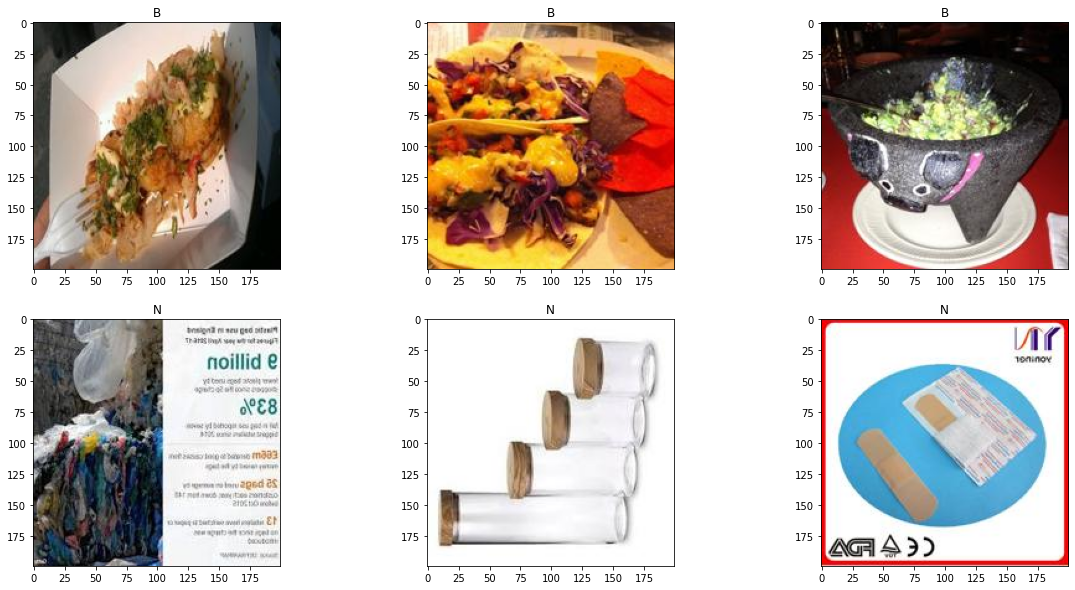

In [ ]:
# visualisasikan sample
visualize(sample_bio + sample_non)

Dari visualisasi sampel diatas:
- Biodegradable merupakan bahan organik seperti sayuran, kue, nasi, buah ataupun bahan-bahan yang bisa terurai oleh mikroorganisme.
- Non-biodegradable seperti pulpen, botol kaca baterai, plastik, kertas dan sebagainya yang bahannya tidak dapat diuraikan oleh organisme. Bahan ini yang dapat dilakukan proses daur ulang sehingga dapat dimanfaatkan kembali serta mengurangi pencemaran lingkungan.

# **5. Data Preprocessing**

Sebelum data dimasukkan kedalam model, data images tersebut harus dilakukan preprosessing terlebih dahulu. Preprosessing seperti melakukan rescale dan augmentasi untuk meningkatkan akurasi atau perfoma dari algoritma yang dibuat [4]

## 5.1 Definisikan fitur dan target

In [20]:
# fitur
X = 'images'
# target
y= 'label'

## 5.2 Split data train, validation dan test

Pada dataset telah dipisahkan antara data train dan test tetapi belum dipisahkan data valisation, oleh karena itu dilkukan split untuk data validation dari data train.

In [ ]:
# split data validation dari 10% train 
train_df, val_df = train_test_split(train_df, train_size=0.9, random_state=23)

In [ ]:
# Tampilkan masing-masing shape
print('Size train: ', train_df.shape)
print('Size validation: ', val_df.shape)
print('Size test: ', test_df.shape)

Size train:  (53903, 2)
Size validation:  (5990, 2)
Size test:  (16538, 2)


## 5.3 Augmentasi

Tentukan ukuran panjang dan lebar untuk semua image sehingga ukuran input dan output sama, tujuannya untuk mencengah terjadinya error saat data dilakukan training.

In [18]:
# definisikan panjang dan lebar
height_img = 180
width_img = 180

# definisikan random number
SEED = 23

# definisikan batch
BATCH = 512

Augmentasi merupakan suatu teknik untuk memperluas atau memperbesar data sehingga model dapat melakukan generalisasi. Hal ini dilakukan untuk mencegah adannya overfitting dan model mengenali pola yang bermacam-macam [3,4].

In [ ]:
# Augmentasi data 

# Lakukan augmentasi hanya pada train
train_datagen= ImageDataGenerator(
              rescale= 1./255, #rescale
              rotation_range= 0.2, #rotasi
              width_shift_range= 0.2, #menggeser image pada sumbu X (horizontal)
              shear_range= 0.2, #mereganggkan image (bisa vertikal atau horizontal)
              zoom_range= 0.2, #memperbesar
              horizontal_flip= True #pencerminan
              )

# Untuk data validation hanya dilakukan rescale
val_datagen= ImageDataGenerator(rescale= 1./255)

# Untuk data test hanya dilakukan rescale
test_datagen= ImageDataGenerator(rescale= 1./255)

Terapkan augmentasi yang dibuat kedalam dataframe

In [ ]:
# data train
ds_train= train_datagen.flow_from_dataframe(
    dataframe= train_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= True, #shuffle hanya di data train
    seed= SEED)

# data validation
ds_val= val_datagen.flow_from_dataframe(
    dataframe= val_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= False,
    seed= SEED)

# data test
ds_test= test_datagen.flow_from_dataframe(
    dataframe= test_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= False,
    seed= SEED)

Found 53903 validated image filenames belonging to 2 classes.
Found 5990 validated image filenames belonging to 2 classes.
Found 16538 validated image filenames belonging to 2 classes.


Cek label dan class dari label

In [ ]:
ds_train.class_indices

{'B': 0, 'N': 1}

- Untuk label biodegradable diwakilkan dengan 0
- Untuk label n0n-biodegradable diwakilkan dengan 1

# **6. Model Definition**

Definisikan Model CNN yang akan dibuat dengan menggunakan sequential API

In [ ]:
# definisikan input size
input = [height_img,width_img,3]

In [ ]:
# definisikan input size
input = [height_img,width_img,3]

# definisikan model
model = Sequential()
# convolution layer
model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape= input))
model.add(MaxPooling2D(pool_size=2, strides=2))
# flatten later
model.add(Flatten())
model.add(Dense(32))
# hidden layer 1
model.add(Dense(16))
# hidden layer 2
model.add(Dense(8))
# output layer
model.add(Dense(1, activation='sigmoid'))

- Definsikan model sequential dan masukkan input sesuai dengan shape dari dataframe
- convolution layer, proses konvolusi merupakan perkalian antara matriks yaitu input dan dan nilai dari filter. Filter yang digunakan adalah 16 dan ouput fitur maps akan menghasilkan ukuran 3x3. Selain itu digunakan pooling atau pengurangan dimensi, hal ini dilakukan untuk mencari informasi fitur yang paling penting (cara kerjanya mirip PCA pada machine learning). Dimodel ini digunakan hanya 1 layer untuk proses konvolusi untuk feature maps [5].
- Flatten layer digunakan untuk membentuk ulang feature maps menjadi sebuah vektor, outputnya nanti akan dimasukkan dalam hidden layer.
- Hidden layer pada model digunakan sebanyak 2 layer dengan neuron sebanyak 16 dan 8. Ini merupakan full connected layer yang akan menghitung skor kelas [7].
- output layer berarti hasil klasifikasi dari kelas, hanya ada 1 neuron yang digunakan karena merupakan binary clasification yang mana hasilnya antara label 0 atau 1. 

Lakukan compile model untuk menerjemahan bahasa kode ke bahasa mesin

In [ ]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

- Digunakan binary crossentropy karena label hanya ada 2 kelas
- optimizer adam karena paling sering digunakan dan memiliki performa yang bagus 
- metrics yang digunakan dalam mentoring menggunakan hasil akurasi dari model

In [ ]:
# summary dari model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dense (Dense)               (None, 32)                4147232   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                        

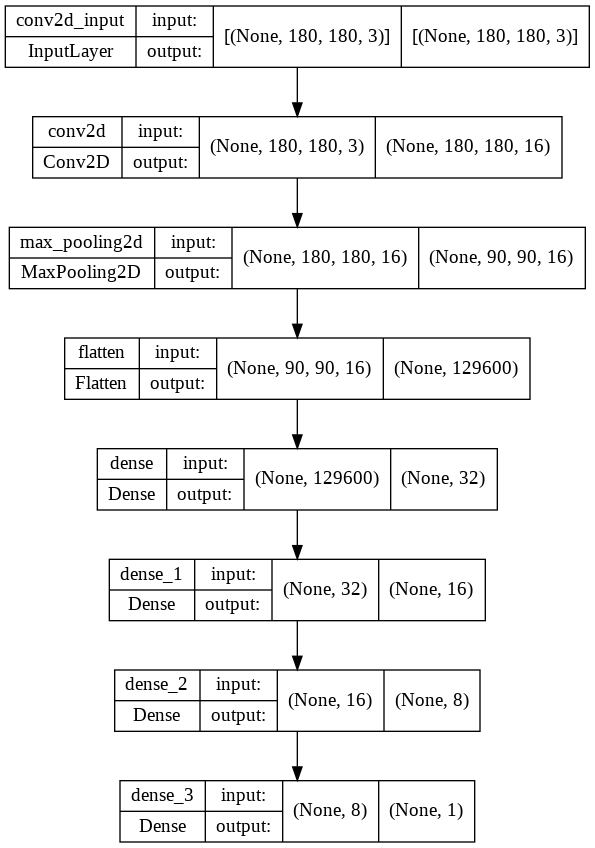

In [ ]:
# plot model
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

# **7. Model Training**

Definsikan list dari callback, 
- Early stopping digunakan untuk menghentikan training jika val_loss tidak ada peningkatan
- Model check point digunakan untuk menyimpan model terbaik dengan monitoring dari nilai akurasi terbaik [6]

In [ ]:
callbacks= [
            EarlyStopping(monitor= 'val_loss', mode='min', patience= 5, verbose=1),
            ModelCheckpoint('model_best.hdf5', monitor='accuracy', save_best_only= True)
]

lakukan training menggunaan model yang telah dibuat

In [ ]:
# training model dengan 20 epoch
history = model.fit(ds_train, 
                    epochs=20, 
                    validation_data=(ds_val),
                    batch_size= BATCH,
                    callbacks= callbacks,
                    verbose=1)

Epoch 1/20
106/106 [==============================] - 429s 4s/step - loss: 5.1835 - accuracy: 0.7603 - val_loss: 0.3591 - val_accuracy: 0.8526
Epoch 2/20
106/106 [==============================] - 402s 4s/step - loss: 0.3722 - accuracy: 0.8492 - val_loss: 0.3398 - val_accuracy: 0.8699
Epoch 3/20
106/106 [==============================] - 407s 4s/step - loss: 0.3610 - accuracy: 0.8545 - val_loss: 0.3286 - val_accuracy: 0.8733
Epoch 4/20
106/106 [==============================] - 407s 4s/step - loss: 0.3582 - accuracy: 0.8556 - val_loss: 0.3295 - val_accuracy: 0.8751
Epoch 5/20
106/106 [==============================] - 386s 4s/step - loss: 0.3549 - accuracy: 0.8552 - val_loss: 0.3480 - val_accuracy: 0.8589
Epoch 6/20
106/106 [==============================] - 390s 4s/step - loss: 0.3594 - accuracy: 0.8545 - val_loss: 0.3279 - val_accuracy: 0.8731
Epoch 7/20
106/106 [==============================] - 404s 4s/step - loss: 0.3527 - accuracy: 0.8557 - val_loss: 0.3270 - val_accuracy: 0.8748

Visualisasikan hasil loss dan akurasi dari training model agar dapat diketahui model yang dibuat sudah baik dan tidak mengalami gradient desent

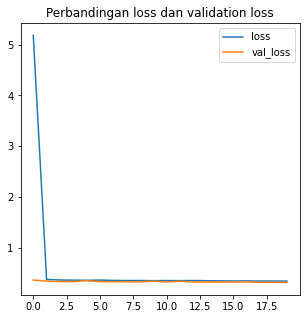

In [ ]:
# ubah ke dataframe
metrics_model = pd.DataFrame(history.history)

# plot loss dan validation loss
metrics_model[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

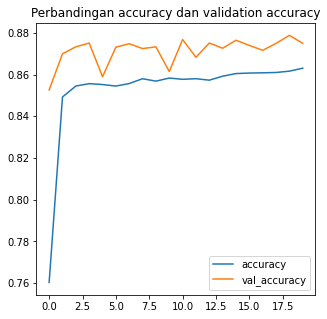

In [ ]:
# plot accuracy dan val_accuracy
metrics_model[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Dari model yang telah dibuat diketauhui bahwa
- Dari loss dan validation loss pada awalnya mengalami penurunan yang signifikan, tetapi setelah epoch ke-2 hingga 20 penurunan loss hanya mengalami sedikit perubahan. Jika dilihat secara sekilas dari grafik loss kita bisa menyo]impulkan bahwa model mengalami vanishing gradiet, tetapi jika dilihat dari loss pada training masih mengalami penurunan.
- Dari segi akurasi, model masih mengalami *overfit* terlihat dari nilai akurasi validation yang cukup berbeda dengan nilai akurasi.
- Telah digunakan early stopping pada training model tetapi training tetap berjalan hingga epoch 20, berarti perlunya tambahan jumlah epoch karena selama training weight masih terus mengalami perubahan penurunan loss dan peningkatan akurasi.
- Perlu dilakukan model improvement agar meningkatkan stabilitas model serta meminimalisir adanya gradient desent.
- Dari performa waktu yang digunakan dalam proses training jika menggunakan 'none' pada runtime maka untuk menyelesaikan 1 epoch butuh waktu +- 15 menit tetapi jika menggunakan GPU runtime butuh waktunya +- 6 menit untuk 1 epoch. Hal ini dipengaruhi karena data train yang cukup banyak dan telah dilakukan augmentasi sehingga dalam proses training memakan waktu yang cukup lama.

# **8. Model Evaluation**

Evaluasi model yang telah dibuat dengan mengecek nilai dari classification report

In [ ]:
# definisikan label
num_label = ds_train.class_indices

# label dari test
y_test = test_df['label'].copy().map(num_label).astype('int')

In [ ]:
# prediksi data test
ds_test.reset()
y_pred_test = model.predict(ds_test, steps= len(ds_test))
# atur threshold 0.5
y_pred_test = np.where(y_pred_test >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      8279
           1       0.80      0.86      0.83      8259

    accuracy                           0.82     16538
   macro avg       0.82      0.82      0.82     16538
weighted avg       0.82      0.82      0.82     16538



- Karena data antara label 0 dan 1 balance maka nilai metrics yang digunakan adalah akurasi. Terlihat bahwa nilai akurasi pada test yaitu 82%. Hal ini menunjukkan model telah baik dalam klasifikasi secara benar.
- Digunakan threshold klasifikasi 0.5 untuk menghindari bias antar class label masing-masing
- Secara keseluruhan sebenarnya model telah bagus secara nilai akurasi tetapi masih mengalami overfit jika dibandingkan dengan dengan validation datanya.

# **9. Model Improvement**

## Model improvement 1

Karena model sebelumnya masih mengalami overfit dalam hal akurasi dan masih perlu menstabilkan model, maka dilakukan improve model. 
- Model menggunakan sequential dengan menambahkan layer convolution layer. Kemudian menambahkan activation function relu pada setiap layer baik pada layer convolution, flatten dan hidden layer.
- Hidden layer hanya ada 1 dan jumlah neuron dikurangi
- Jumlah epoch ditambahkan karena pada training model sebelumnya model menyelesaikan hingga epoch terakhir sehingga ada kemungkinan loss masih dapat berkurang jika epoch ditambahkan pada proses training

In [ ]:
# definisikan model
model_imp = Sequential()
# convolution layer
model_imp.add(Conv2D(filters=16, kernel_size=3, padding='same', activation= 'relu', input_shape= input))
model_imp.add(MaxPooling2D(pool_size=2, strides=2))
# convolution layer
model_imp.add(Conv2D(filters=16, kernel_size=3, padding='same', activation= 'relu', input_shape= input))
model_imp.add(MaxPooling2D(pool_size=2, strides=2))
# flatten later
model_imp.add(Flatten())
model_imp.add(Dense(16, activation= 'relu'))
# hidden layer 1
model_imp.add(Dense(8, activation= 'relu'))
model_imp.add(Dropout(rate=0.2))
# output layer
model_imp.add(Dense(1, activation='sigmoid'))

# compile
model_imp.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# training model dengan 30 epoch
history_imp = model_imp.fit(ds_train, 
                    epochs=30, 
                    validation_data=(ds_val),
                    batch_size= BATCH,
                    callbacks= callbacks,
                    verbose=1)

Epoch 1/30
106/106 [==============================] - 386s 4s/step - loss: 0.4191 - accuracy: 0.8083 - val_loss: 0.2874 - val_accuracy: 0.8840
Epoch 2/30
106/106 [==============================] - 379s 4s/step - loss: 0.3073 - accuracy: 0.8770 - val_loss: 0.2862 - val_accuracy: 0.8771
Epoch 3/30
106/106 [==============================] - 381s 4s/step - loss: 0.2802 - accuracy: 0.8928 - val_loss: 0.2230 - val_accuracy: 0.9130
Epoch 4/30
106/106 [==============================] - 381s 4s/step - loss: 0.2593 - accuracy: 0.9013 - val_loss: 0.2131 - val_accuracy: 0.9192
Epoch 5/30
106/106 [==============================] - 379s 4s/step - loss: 0.2506 - accuracy: 0.9055 - val_loss: 0.2439 - val_accuracy: 0.8938
Epoch 6/30
106/106 [==============================] - 378s 4s/step - loss: 0.2452 - accuracy: 0.9077 - val_loss: 0.2425 - val_accuracy: 0.8935
Epoch 7/30
106/106 [==============================] - 418s 4s/step - loss: 0.2366 - accuracy: 0.9116 - val_loss: 0.2025 - val_accuracy: 0.9152

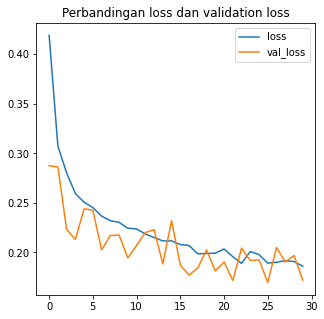

In [ ]:
# ubah ke dataframe
metrics_model_imp = pd.DataFrame(history_imp.history)

# plot loss dan validation loss
metrics_model_imp[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

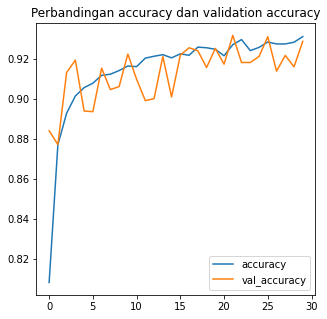

In [ ]:
# plot accuracy dan val_accuracy
metrics_model_imp[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Hasil dari model improvement
- Jika dari perubahan turun nilai loss, sudah baik karena semakin lama loss mengalami penurunan. Tetapi untuk validation loss masih mengalami loss yang tidak stabil (masih naik dan turun). Ada beberapa titik antara loss dan validation loss yang memiliki nilai yang sama. 
- Sama halnya dengan loss, dari akurasi model telah mengalami kenaikan yang cukup signifikan hingga 93%. tetapi untuk validation akurasi masih mengalami ketidakstabilan.

In [ ]:
# prediksi data test
ds_test.reset()
y_pred_test_imp = model_imp.predict(ds_test, steps= len(ds_test))
# atur threshold 0.5
y_pred_test_imp = np.where(y_pred_test_imp >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_test_imp))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      8279
           1       0.74      0.94      0.83      8259

    accuracy                           0.81     16538
   macro avg       0.83      0.81      0.80     16538
weighted avg       0.83      0.81      0.80     16538



- Dari hasil classification report dapat dilihat bahwa akurasi mengalami penurunan 1% jika dibandingkan dengan basic model. Selai itu nilai dari precesion dan recall antar label memiliki prebedaan yang cukup jauh. hal ini dapat disebabkan karena model masih tidak stabil baik dalam hal loss dan akurasi
- Model masih belum cukup bagus karena overfit dan tidak stabil (masih sering terjadi exploiding pada bagian validation)

## Model improvement 2

Mencoba model dengan arsitektur berbeda
- Mengurangi convoluion layer tetapi menambahkan hidden layer. jadi ada 2 hidden layer.
- Memperkecil nilai dari nodes flatten 

In [ ]:
# definisikan model
model_imp1 = Sequential()
# convolution layer
model_imp1.add(Conv2D(filters=16, kernel_size=3, padding='same', activation= 'relu', input_shape= input))
model_imp1.add(MaxPooling2D(pool_size=2, strides=2))
# flatten later
model_imp1.add(Flatten())
model_imp1.add(Dense(16, activation= 'relu'))
# hidden layer 1
model_imp1.add(Dense(8, activation= 'relu'))
model_imp1.add(Dropout(rate=0.2))
# hidden layer 1
model_imp1.add(Dense(4, activation= 'relu'))
model_imp1.add(Dropout(rate=0.2))
# output layer
model_imp1.add(Dense(1, activation='sigmoid'))

# compile
model_imp1.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# training model dengan 30 epoch
history_imp1 = model_imp1.fit(ds_train, 
                    epochs=25, 
                    validation_data=(ds_val),
                    batch_size= BATCH,
                    callbacks= callbacks,
                    verbose=1)

Epoch 1/25
106/106 [==============================] - 431s 4s/step - loss: 0.5129 - accuracy: 0.7063 - val_loss: 0.3658 - val_accuracy: 0.8499
Epoch 2/25
106/106 [==============================] - 407s 4s/step - loss: 0.4516 - accuracy: 0.7707 - val_loss: 0.3338 - val_accuracy: 0.8743
Epoch 3/25
106/106 [==============================] - 387s 4s/step - loss: 0.4348 - accuracy: 0.7774 - val_loss: 0.2985 - val_accuracy: 0.8866
Epoch 4/25
106/106 [==============================] - 383s 4s/step - loss: 0.4193 - accuracy: 0.7846 - val_loss: 0.2868 - val_accuracy: 0.8918
Epoch 5/25
106/106 [==============================] - 399s 4s/step - loss: 0.3923 - accuracy: 0.8365 - val_loss: 0.3700 - val_accuracy: 0.8603
Epoch 6/25
106/106 [==============================] - 392s 4s/step - loss: 0.3644 - accuracy: 0.8618 - val_loss: 0.2605 - val_accuracy: 0.8985
Epoch 7/25
106/106 [==============================] - 389s 4s/step - loss: 0.3384 - accuracy: 0.8764 - val_loss: 0.2547 - val_accuracy: 0.9052

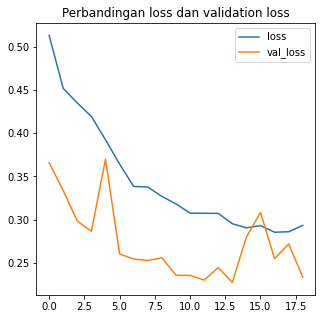

In [ ]:
# ubah ke dataframe
metrics_model_imp1 = pd.DataFrame(history_imp1.history)

# plot loss dan validation loss
metrics_model_imp1[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

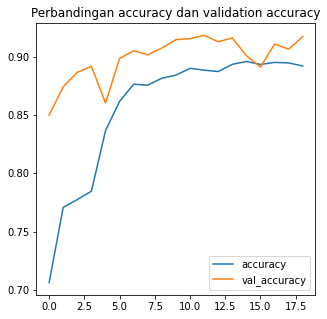

In [ ]:
# plot accuracy dan val_accuracy
metrics_model_imp1[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

- Dari segi loss dan akurasi dapat dilihat pada grafik bahwa model yang dibuat mengalami overfit dan exploiding gradient pada validation.
- untuk loss dan akurasi sudah cukup baik karena mengalami perubahan yang cukup signifikant, tetapi tetap saja model masih dikatakan overfit karena perbedaan antara train dan val yg cukup jauh.
- Ada 25 epoch yang disetting tetapi pada epoch 19 telah berhenti, hal ini disebabkan dari val_loss tidak mengalami penurunan sehingga terdeteksi selama proses training dan dilakukan pemberhentian training

In [ ]:
# prediksi data test
ds_test.reset()
y_pred_test_imp1 = model_imp1.predict(ds_test, steps= len(ds_test))
# atur threshold 0.5
y_pred_test_imp1 = np.where(y_pred_test_imp1 >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_test_imp1))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      8279
           1       0.76      0.93      0.83      8259

    accuracy                           0.81     16538
   macro avg       0.83      0.81      0.81     16538
weighted avg       0.83      0.81      0.81     16538



- Hasil evaluasi akurasi model ini juga mengalami penurunan 1% jika dibandingkan dengan model basic.
- perbedaan antara label 1 dan 0 dari nilai precision dan recall cukup jauh

Setelah melakukan model improvement ternyata hasil yang diperoleh masih mengalami overfit dan akurasinya menurun. Hal ini disebakan karena penambahan layer pada arsitektur masing-masing model imoprovement. Jadi model yang terbaik merupakan model basic karena perbedaan antara loss dan validation loss yang kecil (walaupun dari segi akurasi masih overfit). 

# **10. Model Inference**

Model yang digunakan untuk model inference bukan model basic walaupun model basic yang dipilih sebagai model terbaik. Model inference yang digunakan adalah model dengan akurasi terbaik menurut Model check point secara otomatis dipilih pada saat proses training.

In [22]:
# load best model
best_model = load_model('model_best.hdf5')
best_model

membuat fungsi untuk memprediksi gambar yang diupload [8]

In [ ]:
def predict_image(upload):
  for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
  opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  img = cv2.resize(opencvImage,(180,180))
  img = img.reshape(1,180,180,3)
  a = best_model.predict(img)
  a = np.argmax(a, axis=1)[0]

  if a==1:
    # a='Npn-Biodegradable'
    print('Non-Biodegradable')

  elif a==0:
    # a='biodegradable'
    print("biodegradable")

In [ ]:
# predict new data
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
  with out:
    clear_output()
    try:
      predict_image(uploader)

    except:
      print('Tidak ada file yang diupload')

Klik upload pada button, kemudian pilih gambar yang akan diprediksi

In [ ]:
# upload button
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

Klik predict button untuk melihat hasil prediksi

In [ ]:
# predisi button
button.on_click(on_button_clicked)
widgets.VBox([button, out])

- Model inference yang dibuat telah berhasil melakukan prediksi menggunakan best_model yang telah disimpan
- Tetapi terkadang masih terdapatnya salah prediksi yang dilakukan, hal ini disebabkan karena akurasi atapun model yang masih belum cukup baik.

Selain menggunakan upload image, dilakukan percobaan data inference menggunakan dalam bentuk inference. Data yang diambil dari train yang ekstensi jpeg (tidak diambil pada data train diatas karena train hanya jpg) nah data tersebut yang dilakukan sebagai data inference.

In [16]:
# cari data inf 
inf_bio= glob.glob(train_path + '/B/*.jpeg')
inf_non= glob.glob(train_path + '/N/*.jpeg')

In [17]:
# membuat data inference menjadi dataframe
inf_df = create_df(inf_bio + inf_non)
inf_df= inf_df.sample(frac=1, random_state=23).reset_index(drop=True)

inf_df

,images,label
0,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
1,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
2,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_ORI_...,N
3,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_HFL_...,N
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_9...,B
5,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CCW_...,N
6,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_9...,B
7,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
8,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
9,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B


In [21]:
# lakukan rescaling
inf_datagen= ImageDataGenerator(rescale= 1./255)

# masukkan dalam dataframe inference
ds_inf= inf_datagen.flow_from_dataframe(
    dataframe= inf_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= False,
    seed= SEED)

Found 29 validated image filenames belonging to 2 classes.


Lakukan prediksi untuk data inference

In [29]:
# lakukan prediksi
y_pred_inf = best_model.predict(ds_inf)
# atur threshold untuk klasifikasi
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)

# membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['label Prediction'])
# konversi value
y_pred_inf_df['label Prediction'].replace(to_replace=0, value='B', inplace=True)
y_pred_inf_df['label Prediction'].replace(to_replace=1,  value='N', inplace=True)

In [30]:
# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic = pd.concat([inf_df, y_pred_inf_df], axis=1)
data_inf_predic

,images,label,label Prediction
0,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B,B
1,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B,B
2,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_ORI_...,N,N
3,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_HFL_...,N,N
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_9...,B,B
5,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CCW_...,N,N
6,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_9...,B,N
7,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B,B
8,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B,B
9,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B,N


In [31]:
# hasil sebenarnya
data_inf_predic['label'].value_counts()

B    19
N    10
Name: label, dtype: int64

In [32]:
# hasil prediksi
data_inf_predic['label Prediction'].value_counts()

N    17
B    12
Name: label Prediction, dtype: int64

- hasil dari 29 data masih ada 2 data yang masih salah terprediksi. Jadi hanya ada 93% data yang diprediksi benar.
- Masih perlunya peningkatan akurasi sehingga model dapat diterapkan dalam klasifikasi limbah dapat berjalan optimal.

# **11. Kesimpulan**

Pada assigment ini dibuat model computer vision menggunakan CNN untu melakukan klasifikasi gambar. Dataset yang digunakan adalah Non and *Biodegradable Material Dataset* yang telah terpisah antara direktori test dan train. Untuk data train hanya dipilih salah satu direktori yaitu 'TRAIN.1' dengan ekstensi .jpg

**EDA**
- Dari proses EDA dapat diketahui bahwa jumlah label biodegadable dan non-biodegradable memiliki jumlah yang balance karena perbedaan antar keduanya hanya sekitar 1%.
- Dari visualisasi sample untuk kelas biodegradable dapat diketahui bahwa kelas ini merupakan bahan organik seperti kue, sayuran, buah-buahan dan sebagainya yang dapat diuraikan oleh mikroorganisme. Sedangkan untuk kelas non-biodegradable merupakan sampah yang sebagian besar dapat dimanfaatkan kembali atau daur ulang seperti botol bekas, kaca, kertas dan sebagainya.
- Label biodegradable diwakilkan oleh 0 dan non-biodegradable diwakilkan oleh 1

**Preprosessing**
Pada proses preprosessing dilakukan rescaling pada semua ukuran gambar menjadi 180x180 agar saat gambar masuk proses training model tidak terjadinya error karena perbedaan ukuran gambar. Disini juga dilakukan augmentasi berupa zoom, rescale pixel, shear, width range dan rotasi, tetapi untuk data test dan val hanya silakukan rescale pixel.

**Model**
- Model terbaik yang telah dilakukan adalah model basic, karena dari nilai lossnya hampir sama walaupun dari akurasi masih mengalami overfit.
- telah dilakukan model improvement dengan menmbahkan layer convolution, dropout, activation function tetapi untuk validation loss dan validation akurasi mengalami ketidakstabilan dan exploiding. Untuk loss dan akurasi train menunjukkan bahwa perubahan nilai penurunan loss dan peningkatan akurasi mengalami perubahan yang signifikan dan baik. Tetapi model ini tidak dapat dikatakan baik karena masih mengalami exploiding dan terdapat perbedaan antara train dan validation
- Ada 2 model improvement yang dilakukan tetapi hasil keduanya masih kurang baik
- Dari perbandingan classification report test, hasil akurasi dari model basic menunjukkan 82% sedangkan model yang diimprove 81%. Selain itu dari nilai precesion, recall dan f1score model basic memiliki rata-rata yang hampir sama +- 80%. Hal ini menjadi salah satu alasan mengapa model basic masih lebih baik dari model yang telah diimprove
- Model inference yang digunakan berdasarkan best model yang dimonitoring oleh model check point. Masih ada beberapa data yang salah prediksi sehingga masih perlu perbaikan. Untu data inference dalam bentuk dataframe, masih ada kesalahan yang diprediksi oleh model.
- Performa dari segi waktu, untuk penggunaan runtime GPU untuk menyelesaikan 1 epoch butuh +- 6 menit sedangkan runtime none +- 15 menit. Artinya dalam menyelesaikan training 20-30 epoch memakan waktu +- 3.5 jam (GPU) dan +- 7.5 jam (none runtime). 
- Seharusnya pada model improventment yang dilakukan mengurangi layer karena pada model basic terdeteksi overfit tetapi malah menambahkan layer, hal tersebut yang mengakibatkan overfit yang lebih tinggi dibanding model basic.

Secara keseluruhan model yang dibuat belum cukup baik karena masih terdeteksi overfit baik dari loss dan akurasi. Perlunya dilakukan eksplorasi lebih lanjut untuk menenemukan arsitektur model terbaik untuk dataset ini. Proses training yang cukup lama dan kendala device sehingga kurangnya proses eksplorasi lebih lanjut. Pentingnya juga peningkatan terhadap akurasi dari model karena untuk pengaplikasian klasifikasi deteksi gambar jika masih salah dalam melakukan deteksi maka limbah akan tetap tercampur dan sulit diolah.


# Referensi

- [1] Dataset: https://www.kaggle.com/datasets/rayhanzamzamy/non-and-biodegradable-waste-dataset
- [2] Materi P2W1D2PM: https://colab.research.google.com/drive/1TuUlbAs6x3NZyAJjbJdZVQKsXXHVWAWz?usp=sharing
- [3] Materi P2W2D1: https://colab.research.google.com/github/ardhiraka/FSDS_Guidelines/blob/master/p2/w2/d1pm.ipynb#scrollTo=uA9_z82NBgS2
- [4] https://freecontent.manning.com/the-computer-vision-pipeline-part-3-image-preprocessing/
- [5] https://medium.com/nodeflux/mengenal-convolutional-layer-dan-pooling-layer-3c6f5c393ab2
- [6] https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
- [7] https://medium.com/@nadhifasofia/1-convolutional-neural-network-convolutional-neural-network-merupakan-salah-satu-metode-machine-28189e17335b
- [8] https://www.youtube.com/watch?v=1ppPO9fCT2w&t=176